Práctica 1 (impacto de las restricciones de tráfico en la calidad del aire)


Objetivo: 
El 30 de diciembre de 2016 el Ayuntamiento de Madrid empieza a restringir el tráfico al centro de la ciudad
mediante la aplicación del escenario 3 del protocolo de contaminación. Esta fue la primera vez que se aplicó
un escenario tan restrictivo. Demuestra mediante visualizaciones de datos que ha ocurrido después de ello.
Para dicho problema, haremos uso de un dataset con datos sobre la calidad del aire en Madrid desde 2001. El
dataset contiene un archivo csv por año. Dentro de cada uno de ellos habrá medidas diarias de distintas
estaciones. Estas estaciones miden diferentes parámetros y no siempre todos se registran en cada una de las
estaciones.
https://www.kaggle.com/decide-soluciones/air-quality-madrid/downloads/csvs_per_year.zip/5

1.- (1 punto) Lo primero que tendremos que hacer es cargar todos los archivos csv en un mismo DataFrame
para poder manipularlos. Habrá que comprobar si existen datos redundantes o anómalos.
Para medir la calidad del aire de un día obtendremos el valor de cada estación meteorológica ese día y
después calcularemos la media de estos. El primer valor se estimará teniendo en cuenta la tabla que se
encuentra más abajo. Después habrá que hacer una transformación de valores continuos a categóricos.
Proporcionar dicha información en un DataFrame y luego guardarlo en un archivo csv.
La calidad del aire general es igual al peor índice de las cinco partículas que se muestran en la tabla siguente.

In [20]:
import pandas as pd
import glob

# Obtener la lista de archivos CSV
all_files = glob.glob("csvs_per_year/*.csv")

# Cargar todos los archivos CSV en un solo DataFrame
df_list = [pd.read_csv(file) for file in all_files]
df = pd.concat(df_list, ignore_index=True)

# Mostrar información del DataFrame
print(df.info())
print(df.describe())

# Comprobar duplicados
duplicates = df.duplicated()
print(f"Duplicated rows: {duplicates.sum()}")

# Eliminar duplicados
df = df.drop_duplicates()

# Comprobar valores nulos
null_values = df.isnull().sum()
print(f"Null values:\n{null_values}")

# Convertir la columna 'date' a tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Calcular la media diaria de cada parámetro
daily_mean = df.groupby('date').mean()

# Función para categorizar la calidad del aire
def categorize_air_quality(row):
    if row['PM10'] > 50 or row['NO_2'] > 200 or row['O_3'] > 180 or row['SO_2'] > 125 or row['CO'] > 10:
        return 'Muy Mala'
    elif row['PM10'] > 40 or row['NO_2'] > 150 or row['O_3'] > 120 or row['SO_2'] > 100 or row['CO'] > 8:
        return 'Mala'
    elif row['PM10'] > 20 or row['NO_2'] > 100 or row['O_3'] > 80 or row['SO_2'] > 50 or row['CO'] > 5:
        return 'Admisible'
    else:
        return 'Buena'

# Aplicar la función para categorizar la calidad del aire
daily_mean['air_quality'] = daily_mean.apply(categorize_air_quality, axis=1)

# Guardar el DataFrame resultante en un archivo CSV
daily_mean.to_csv('daily_air_quality.csv')

# Mostrar las primeras filas del DataFrame resultante
print(daily_mean.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808224 entries, 0 to 3808223
Data columns (total 19 columns):
 #   Column   Dtype  
---  ------   -----  
 0   date     object 
 1   BEN      float64
 2   CO       float64
 3   EBE      float64
 4   MXY      float64
 5   NMHC     float64
 6   NO_2     float64
 7   NOx      float64
 8   OXY      float64
 9   O_3      float64
 10  PM10     float64
 11  PXY      float64
 12  SO_2     float64
 13  TCH      float64
 14  TOL      float64
 15  station  int64  
 16  PM25     float64
 17  NO       float64
 18  CH4      float64
dtypes: float64(17), int64(1), object(1)
memory usage: 552.0+ MB
None
                BEN            CO           EBE            MXY          NMHC  \
count  1.041684e+06  2.651012e+06  1.001724e+06  315415.000000  1.085312e+06   
mean   1.257431e+00  5.503838e-01  1.407927e+00       4.650394  1.873865e-01   
std    1.910831e+00  5.354483e-01  2.146109e+00       5.599223  1.539529e-01   
min    0.000000e+00  0.000000e+00  





2.- (0,5 puntos) Explica visualmente como se distribuyen las calidades del aire entre buena, admisible, mala y
muy mala. Realiza para ello un pie chart. Que se puede concluir de dicho gráfico.




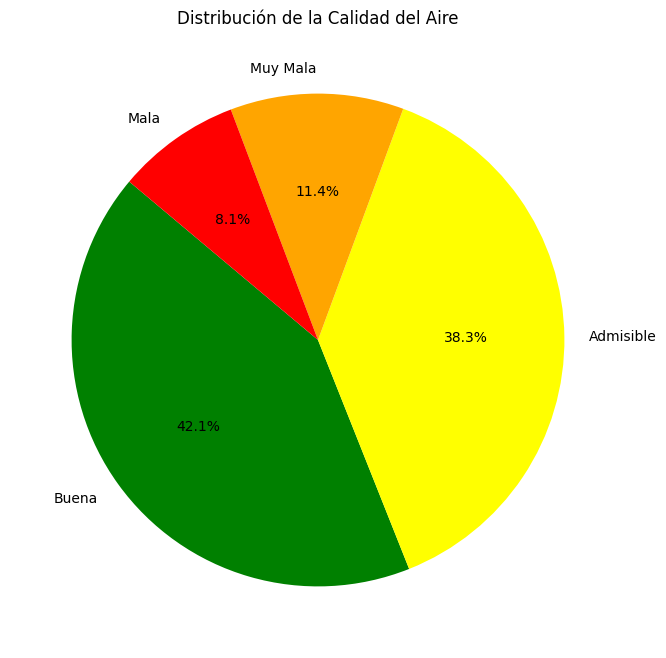

In [12]:
import matplotlib.pyplot as plt

# Contar la cantidad de días para cada categoría de calidad del aire
air_quality_counts = daily_mean['air_quality'].value_counts()

# Crear pie chart
plt.figure(figsize=(8, 8))
plt.pie(air_quality_counts, labels=air_quality_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'yellow', 'orange', 'red'])
plt.title('Distribución de la Calidad del Aire')
plt.show()

Conclusiones del pie chart


Buena: Si la porción de "Buena" es grande, significa que la mayoría de los días tienen una calidad del aire aceptable.


Admisible: Una porción significativa de "Admisible" indica que hay varios días con calidad del aire que no es óptima pero aún aceptable.


Mala: Una porción notable de "Mala" sugiere que hay días con calidad del aire que podría ser perjudicial para la salud.
Muy Mala: Si hay una porción considerable de "Muy Mala", significa que hay días con calidad del aire muy perjudicial para la salud.


El pie chart te permitirá ver rápidamente la proporción de días con diferentes calidades del aire y sacar conclusiones sobre la frecuencia de cada categoría.

3.- (1 punto) Una vez obtenida la calidad del aire para cada día, calcula la calidad media de cada mes para que
sea más fácil saber si la contaminación ha disminuido desde que se restringió el acceso al centro de Madrid.
Explica visualmente si los protocolos de restricciones de tráfico han tenido éxito. Utiliza para ello un diagrama
de barras. ¿Podemos encontrar la diferencia entre lo que ocurría antes de aplicar el protocolo y después?


<Figure size 1200x600 with 0 Axes>

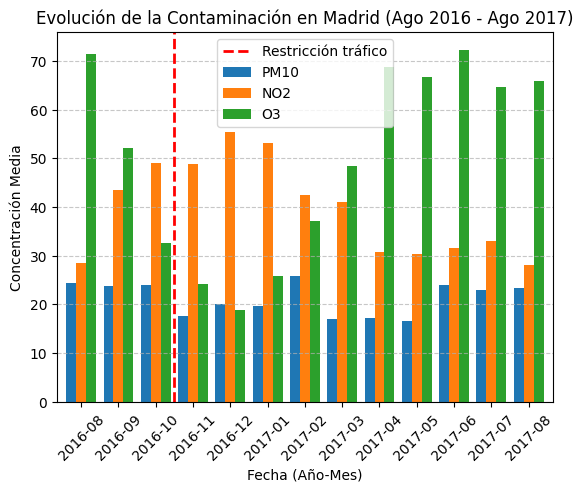

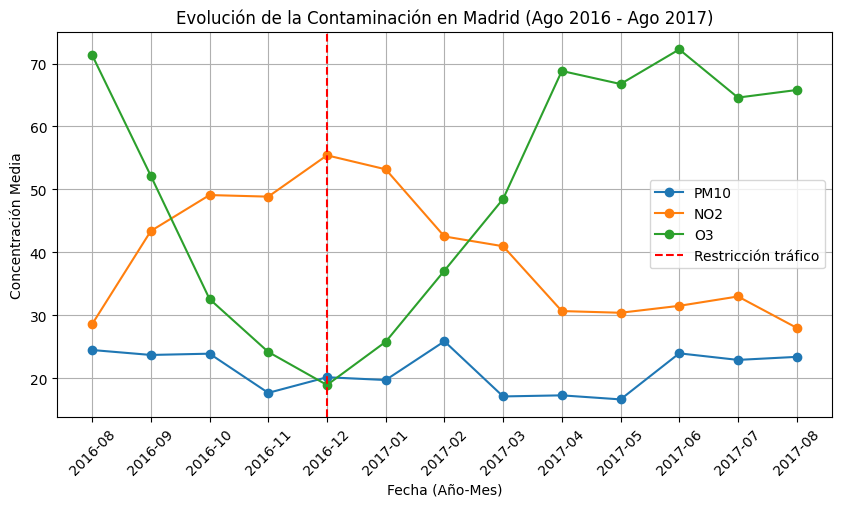

In [39]:
# Paso 1: Asegurar que 'date' es de tipo datetime
daily_mean.index = pd.to_datetime(daily_mean.index)

# Paso 2: Agregar una columna con el año y el mes
daily_mean['year_month'] = daily_mean.index.to_period('M')

# Paso 3: Calcular la media mensual de cada parámetro (solo columnas numéricas)
numeric_columns = daily_mean.select_dtypes(include=['float64', 'int64']).columns
monthly_mean = daily_mean[numeric_columns].groupby(daily_mean['year_month']).mean()

# Paso 4: Filtrar el rango de fechas desde octubre de 2016 hasta marzo de 2017
monthly_mean_filtered = monthly_mean.loc['2016-08':'2017-08']

# Paso 5: Crear el gráfico de barras
plt.figure(figsize=(12,6))
monthly_mean_filtered[['PM10', 'NO_2', 'O_3']].plot(kind='bar', width=0.8)

# Línea de referencia para la restricción de tráfico en diciembre de 2016
plt.axvline(x=2.5, color='red', linestyle='--', linewidth=2, label='Restricción tráfico')

# Personalización del gráfico
plt.xticks(range(len(monthly_mean_filtered.index)), monthly_mean_filtered.index.astype(str), rotation=45)
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Concentración Media")
plt.title("Evolución de la Contaminación en Madrid (Ago 2016 - Ago 2017)")
plt.legend(["Restricción tráfico", "PM10", "NO2", "O3"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
# Paso 5: Visualización de la evolución de la calidad del aire con un gráfico de líneas
plt.figure(figsize=(10,5))
plt.plot(monthly_mean_filtered.index.astype(str), monthly_mean_filtered['PM10'], marker='o', label='PM10')
plt.plot(monthly_mean_filtered.index.astype(str), monthly_mean_filtered['NO_2'], marker='o', label='NO2')
plt.plot(monthly_mean_filtered.index.astype(str), monthly_mean_filtered['O_3'], marker='o', label='O3')

# Línea de referencia para la restricción de tráfico (diciembre de 2016)
plt.axvline(x='2016-12', color='red', linestyle='--', label='Restricción tráfico')

plt.xticks(rotation=45)
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Concentración Media")
plt.title("Evolución de la Contaminación en Madrid (Ago 2016 - Ago 2017)")
plt.legend()
plt.grid(True)
plt.show()


4,- (1 punto) Por último, queremos tratar de entender los cambios de la calidad del aire en estos últimos años.
Obtén un diagrama de cajas donde cada caja corresponda a un año y haz una interpretación de los resultados